<a href="https://colab.research.google.com/github/ReuelNixon/learn-pytorch/blob/main/03_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [25]:
# Check for GPU
!nvidia-smi

Tue Sep 26 01:20:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    35W /  70W |   1125MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.0.1+cu118
Using device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self driving cars
2. Defective product identification
3. Face recognition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

A common phenomenon in which the model learns the noise or unwanted stuff from the data such that it affects the model in a negative way

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Adding more diverse data to the dataset
2. Using a model suitable for the dataset i.e a simple model for a simple dataset
3. Early stopping
4. K-fold cross validation
5. Adding noise to the training data

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [27]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
from torch import nn

train_data = MNIST(
    root = "data",
    transform = ToTensor(),
    train = True,
    download = True
)

test_data = MNIST(
    root = "data",
    transform = ToTensor(),
    train = False,
    download = True
)

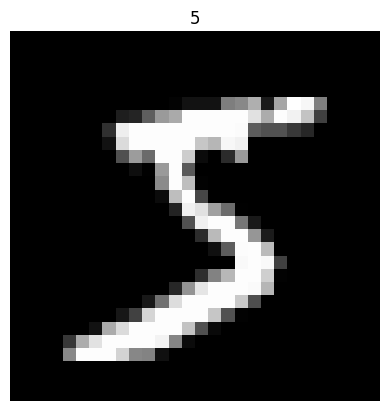

In [28]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray");
plt.title(label);
plt.axis(False);

## 6. Visualize at least 5 different samples of the MNIST training dataset.

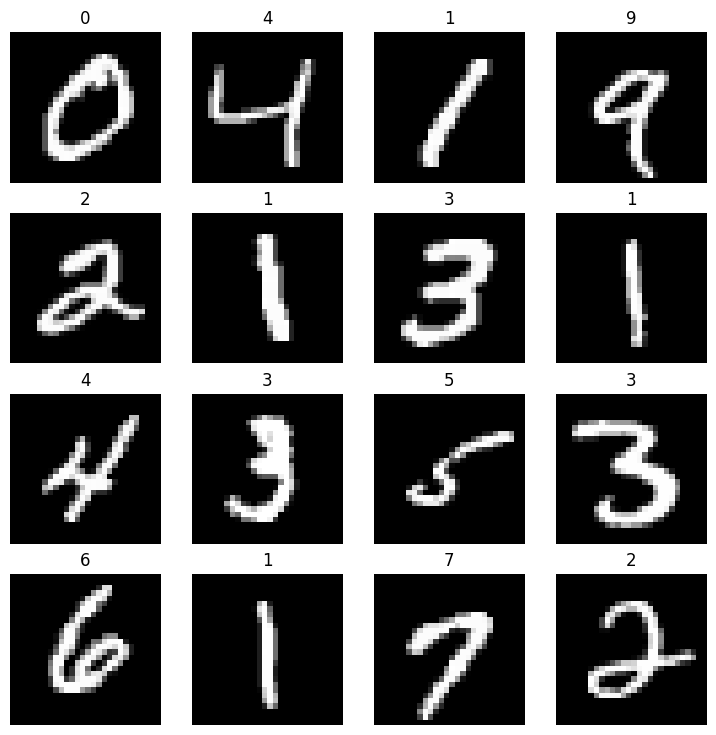

In [29]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [30]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = True
)

len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
print(f"PyTorch Version: {torch.__version__}")

class MNISTModelV0(nn.Module):
  def __init__(self, in_features, intermediate_features, out_features):
    super().__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(
            in_channels = in_features,
            out_channels = intermediate_features,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = intermediate_features,
            out_channels = intermediate_features,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 3,
            stride = 2
        )
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(
            in_channels = intermediate_features,
            out_channels = intermediate_features,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = intermediate_features,
            out_channels = intermediate_features,
            kernel_size = 3,
            stride = 1,
            padding = 1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size = 3,
            stride = 2
        )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(intermediate_features * 6 * 6, out_features)
    )

  def forward(self, x: torch.Tensor):
    # print(f"Size before passing into block 1: {x.size()}")
    x = self.block1(x)
    # print(f"Size after passing into block 1: {x.size()}")
    x = self.block2(x)
    # print(f"Size after passing into block 2: {x.size()}")
    x = self.classifier(x)
    # print(f"Size after passing into classifier: {x.size()}")
    return(x)

Using device: cuda
PyTorch Version: 2.0.1+cu118


In [32]:
model = MNISTModelV0(
    in_features = 1,
    intermediate_features = 10,
    out_features = 10
).to(device)

model

MNISTModelV0(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360, out_features=10, bias=True)
  )
)

In [33]:
image = image.to(device)
model(image.unsqueeze(0))

tensor([[-0.0469, -0.0851, -0.0485, -0.0062,  0.0392,  0.0707, -0.0081, -0.0244,
         -0.0606, -0.0103]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [34]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [35]:
def train_step(model, dataloader, loss_fn, optimizer, accuracy_fn, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    train_preds = model(X)

    loss = loss_fn(train_preds, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred = train_preds.argmax(1), y_true = y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch % 400 == 0):
      print(f"Finished going through {batch * len(X)} / {len(dataloader)} samples")

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss}\tTrain Accuracy: {train_acc}")


def test_step(model, dataloader, loss_fn, accuracy_fn, device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      test_preds = model(X)
      test_loss += loss_fn(test_preds, y)
      test_acc += accuracy_fn(y_pred = test_preds.argmax(1), y_true = y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss: {test_loss}\tTest Accuracy: {test_acc}")


def evaluate(model, dataloader, loss_fn, accuracy_fn, device):
  loss, accuracy = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      preds = model(X)
      loss += loss_fn(preds, y)
      accuracy += accuracy_fn(y_pred = preds.argmax(1),y_true = y)

    loss /= len(dataloader)
    accuracy /= len(dataloader)

    return {
        "name": model.__class__.__name__,
        "accuracy": accuracy,
        "loss": loss.item()
    }

In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

In [37]:
epochs = 5
for epoch in range(epochs):
  train_step(
      model,
      train_dataloader,
      loss_fn,
      optimizer,
      accuracy_fn,
      device
  )
  test_step(
      model,
      test_dataloader,
      loss_fn,
      accuracy_fn,
      device
  )

Finished going through 0 / 1875 samples
Finished going through 12800 / 1875 samples
Finished going through 25600 / 1875 samples
Finished going through 38400 / 1875 samples
Finished going through 51200 / 1875 samples
Train Loss: 0.31498202681541443	Train Accuracy: 89.455
Test Loss: 0.07890153676271439	Test Accuracy: 97.4341054313099
Finished going through 0 / 1875 samples
Finished going through 12800 / 1875 samples
Finished going through 25600 / 1875 samples
Finished going through 38400 / 1875 samples
Finished going through 51200 / 1875 samples
Train Loss: 0.07120677083730698	Train Accuracy: 97.82666666666667
Test Loss: 0.05068192258477211	Test Accuracy: 98.3526357827476
Finished going through 0 / 1875 samples
Finished going through 12800 / 1875 samples
Finished going through 25600 / 1875 samples
Finished going through 38400 / 1875 samples
Finished going through 51200 / 1875 samples
Train Loss: 0.05519070476293564	Train Accuracy: 98.26333333333334
Test Loss: 0.05182890594005585	Test Acc

In [38]:
model_results = evaluate(
    model,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)
model_results

{'name': 'MNISTModelV0',
 'accuracy': 98.78194888178913,
 'loss': 0.03641359880566597}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [39]:
def make_predictions(model, data, device):
  model.eval()
  preds = []
  for sample in data:
    pred_logit = model(sample.unsqueeze(0).to(device))
    pred_probs = torch.softmax(pred_logit.squeeze(), dim=0)
    pred = pred_probs.argmax(0)
    preds.append(pred.cpu())

  return torch.stack(preds)

In [40]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  sample = sample.to(device)
  test_samples.append(sample)
  test_labels.append(label)

test_labels

[2, 0, 3, 1, 6, 3, 7, 4, 8]

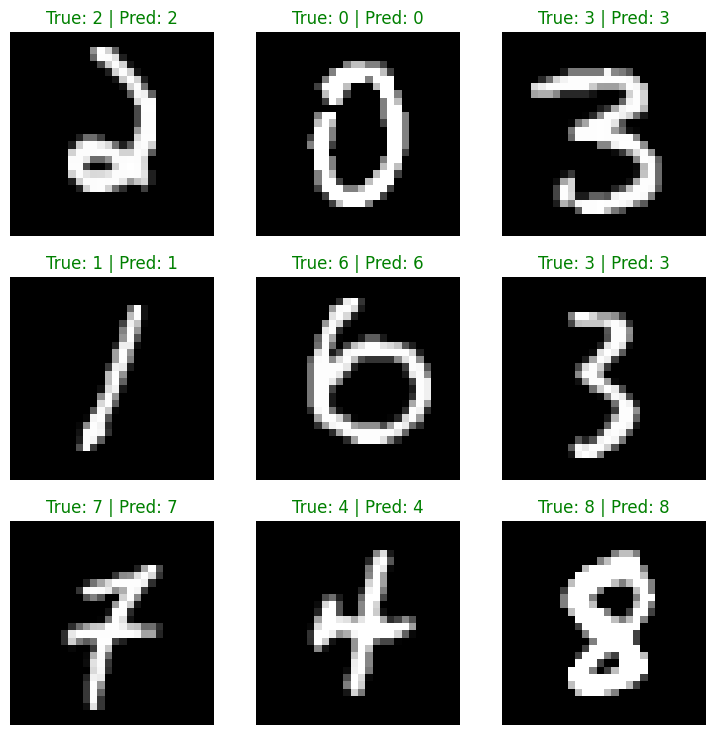

In [41]:
preds = make_predictions(model, test_samples, device)
fig = plt.figure(figsize = (9, 9))
rows, cols = 3, 3
for i in range(1, rows*cols + 1):
  image = test_samples[i-1].cpu()
  label = test_labels[i-1]
  pred = preds[i-1]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  text = f"True: {label} | Pred: {pred}"
  if pred == label:
      plt.title(text, fontsize=12, c="g")
  else:
      plt.title(text, fontsize=12, c="r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [42]:
y_preds = []
y_true = []
model.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
    y_true.append(y.cpu())
y_pred_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_true)

In [43]:
!pip install -q torchmetrics;

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

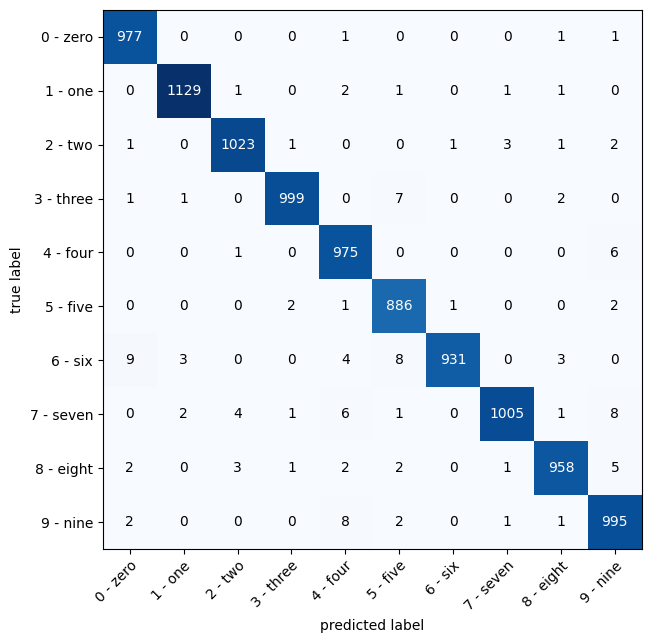

In [44]:
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat_tensor = confmat(preds = y_pred_tensor, target = y_true_tensor)
plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = test_data.classes,
    figsize = (10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [45]:
conv2d = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size = 32,
    stride = 1,
    padding = 1
)

sample = torch.rand(size = (1, 3, 64, 64))
pred = conv2d(sample)
pred

tensor([[[[-0.3221, -0.0886, -0.0373,  ..., -0.0717, -0.4309,  0.0432],
          [-0.3193, -0.2515, -0.5557,  ..., -0.3989, -0.4013, -0.4322],
          [-0.4975, -0.3829, -0.0338,  ..., -0.4227, -0.5359, -0.4966],
          ...,
          [-0.2544, -0.2236, -0.2565,  ..., -0.4681, -0.2607, -0.2909],
          [-0.3870, -0.3040, -0.3486,  ..., -0.1773, -0.4145, -0.3728],
          [-0.5055, -0.2533, -0.0432,  ..., -0.1433, -0.2927, -0.3818]],

         [[-0.2578, -0.2445, -0.4192,  ...,  0.0395, -0.2882, -0.1634],
          [-0.1829, -0.2804, -0.1464,  ..., -0.2138,  0.0855, -0.2904],
          [ 0.0237,  0.0267, -0.1898,  ..., -0.0950, -0.4059,  0.0198],
          ...,
          [-0.1087, -0.0736, -0.0654,  ..., -0.1741,  0.1810, -0.1446],
          [-0.4529,  0.1318,  0.1214,  ..., -0.1467, -0.2587, -0.2062],
          [-0.2509, -0.5449,  0.0119,  ..., -0.2145,  0.0610, -0.1593]],

         [[-0.1758, -0.5950, -0.3016,  ..., -0.0512, -0.2744, -0.3557],
          [-0.5926, -0.2835, -

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

The wrong predictions that the model had made are on some specific cases in which the the data is difficult to classifu evn for a  human. So the problem is more of a data error than modelling error